# Sampling in Python - Datcamp course
### Notes by César Muro Cabral
The technique of working with a subset of the whole population is called *sampling*.  
The *population* is the whole dataset.  
The *sample* is the subset of data you calculate on.  
In pandas, there exists the .sample(n) method returns a random subset of n rows.  
A *population parameter* is a calculation made on the population dataset.  
A *point estimate* or *sample statistic* is a calculation made on the sample dataset.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the course arrays
attrition_pop = pd.read_feather("datasets/attrition.feather")
spotify_population = pd.read_feather("datasets/spotify_2000_2020.feather")
coffee = pd.read_feather("datasets/coffee_ratings_full.feather")

In [2]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(1000)

# Print the sample
print(spotify_sample.head())

       acousticness  ...    year
25294      0.362000  ...  2002.0
23331      0.390000  ...  2003.0
11469      0.053600  ...  2009.0
13995      0.000344  ...  2014.0
19957      0.114000  ...  2012.0

[5 rows x 20 columns]


In [3]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.9094168833333334


In [4]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.969349999999999


## Convenience sampling 
 Sampling a not representative population cause *sample bias*.  
 Collecting data by the easiest method is called *convenience sampling*.  
 Before sampling, we need to think on the data collection process to avoid biased results. 
 Histograms are a great way to visualize the selection bias.

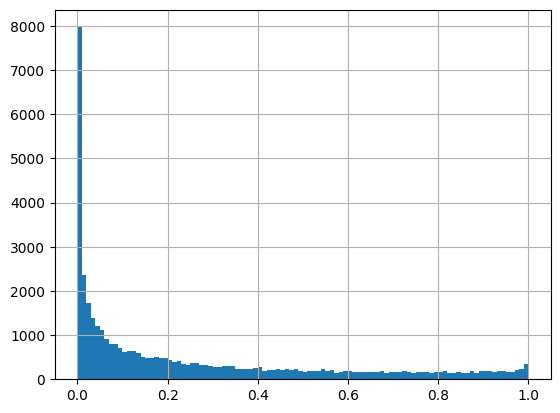

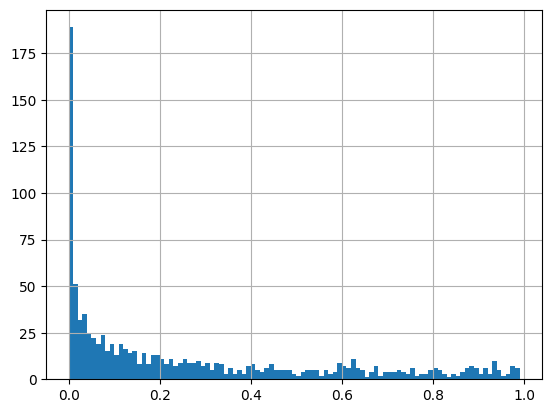

In [5]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0,1.01,0.01))
plt.show()
spotify_sample['acousticness'].hist(bins=np.arange(0,1,0.01))
plt.show()

Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

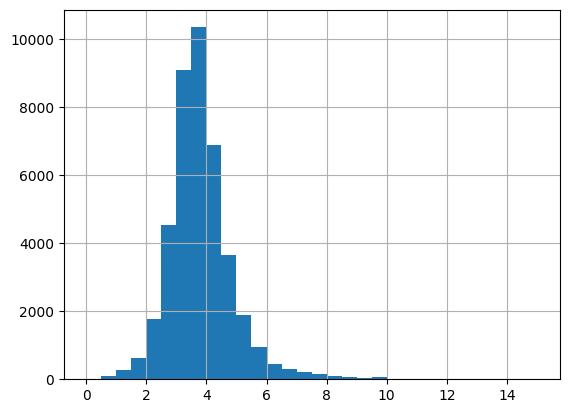

In [6]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0,15.5,0.5))
plt.show()

## Pseudo-random number generation
Pseudo-random number generation is cheap and fast.  
Next "random" number is calculated from previous random number.  
The first random number is calculated from a seed.  
Python employ some functions as the beta, hypergeometric, or poisson to generate random numbers. Prepend with numpy.random, as numpy.random.beta()  
To set a random seed we use numpy.random.seed()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

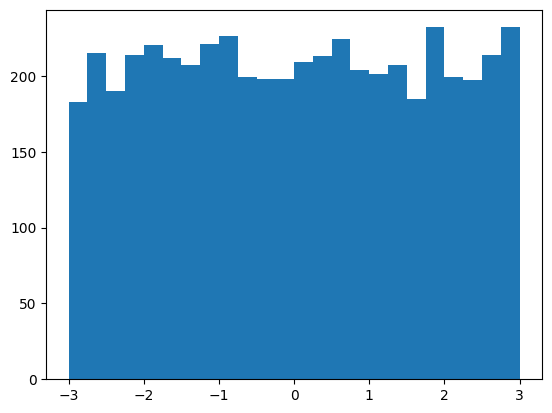

In [8]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms,bins=np.arange(-3,3.25,0.25))
plt.show()

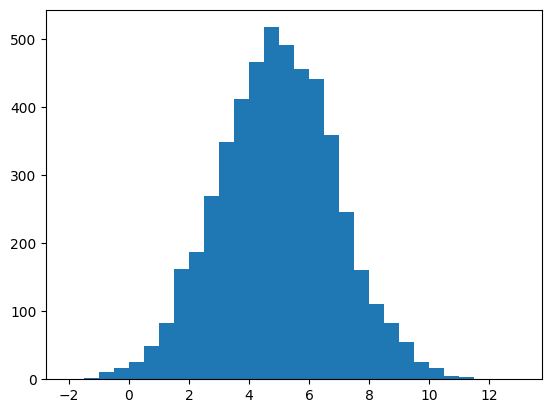

In [9]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals,bins=np.arange(-2,13.5,0.5))
plt.show()

## Simple random sampling 
In pandas, df.sample(n=,random_state=) the random state argument allows to set a seed.  

In systematic sampling, it samples the population at regular intervals. It is only safe if we don't see any pattern in a scatter plot. To ensure that systematic sampling is safe, we can randomize the row order before sampling.  

In this exercise we'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [10]:
attrition_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int32   
 1   Attrition                 1470 non-null   float64 
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int32   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int32   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int32   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   int32   
 13  JobRole                   1470 non-null   catego

In [11]:
attrition_pop.describe()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(70,random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
1134   35        0.0  ...                      10                     1
1150   52        0.0  ...                       0                     0
531    33        0.0  ...                       1                     6
395    31        0.0  ...                       0                     1
392    29        0.0  ...                       1                     3
...   ...        ...  ...                     ...                   ...
361    27        0.0  ...                       0                     4
1180   36        0.0  ...                       6                     7
230    26        0.0  ...                       0                     0
211    29        0.0  ...                       0                     2
890    30        0.0  ...                       0                     7

[70 rows x 31 columns]


In [13]:
# Systematically sampling
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      21        0.0  ...                       0                     0
21     19        0.0  ...                       0                     0
42     45        0.0  ...                       0                     0
63     23        0.0  ...                       0                     1
84     30        1.0  ...                       0                     0
...   ...        ...  ...                     ...                   ...
1365   48        0.0  ...                       0                     0
1386   48        0.0  ...                       4                     8
1407   50        0.0  ...                      13                     8
1428   50        0.0  ...                      14                     7
1449   52        0.0  ...                      11                     9

[70 rows x 31 columns]


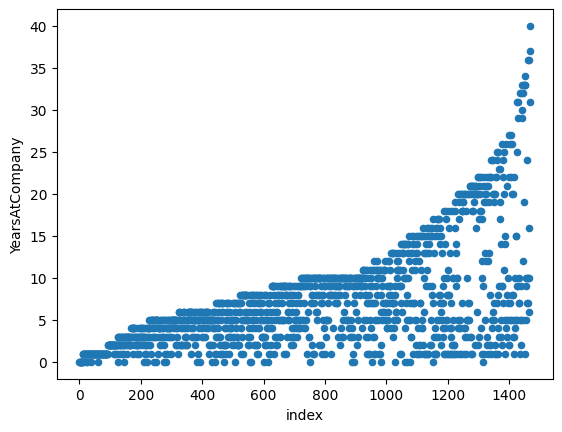

In [14]:
#Is systematically sampling ok?
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index",y="YearsAtCompany",kind="scatter")
plt.show()

The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

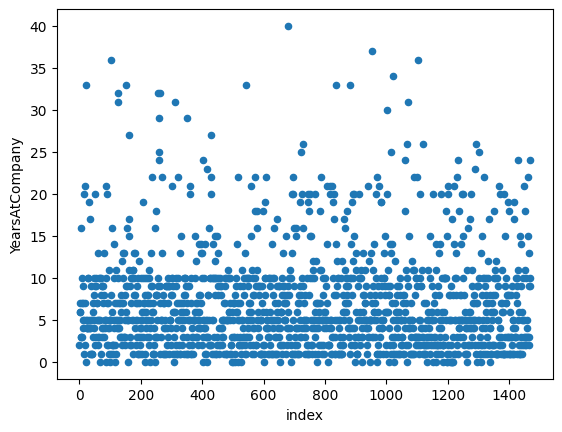

In [15]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index",y="YearsAtCompany",kind="scatter")
plt.show()

## Stratified and weighted random sampling
Stratified sampling is a technique that allows us to sample a population that contains subgroups. 
If we care about the proportions of each subgroup in the sample closely matching those in the population, then we can group the data before taking the simple random sample.  

One variation of stratified sampling is to sample equal counts from each group, rather than an equal proportion. This time, we use the n argument in dot-sample instead of frac.  

A close relative of stratified sampling that provides even more flexibility is weighted random sampling. In this variant, we create a column of weights that adjust the relative probability of sampling each row.  Using the where function from NumPy, we can set a weight of two for rows that match the condition and a weight of one for rows that don't match the condition.  When we call dot-sample, we pass the column of weights to the weights argument. 

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [16]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education").sample(frac=0.4,random_state=2022)


# Print the sample
print(attrition_strat)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64
      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
1191   53        0.0  ...                       8                    10
407    29        0.0  ...                       1                     3
1233   59        0.0  ...                       1                     3
366    37        0.0  ...                       4                     3
702    31        0.0  ...                       1                     4
...   ...        ...  ...                     ...                   ...
733    38        0.0  ...                       9                     9
1061   44        0.0  ...                       0                     2
1307   41        0.0  ...                      11                     8
1060   33        0.0  ...                       0                     0
177    29        0.0  ...                     

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [17]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


Weighted sampling

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

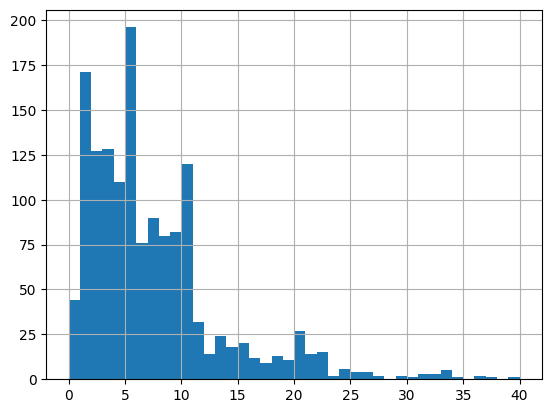

      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
1034   36        0.0  ...                       0                     4
442    32        0.0  ...                       0                     5
895    35        1.0  ...                       7                     7
1113   36        0.0  ...                      11                    11
1400   47        0.0  ...                      11                    13
...   ...        ...  ...                     ...                   ...
248    28        0.0  ...                       0                     2
656    27        0.0  ...                       0                     7
428    27        0.0  ...                       0                     2
1108   35        0.0  ...                       1                     7
412    27        0.0  ...                       1                     2

[400 rows x 31 columns]


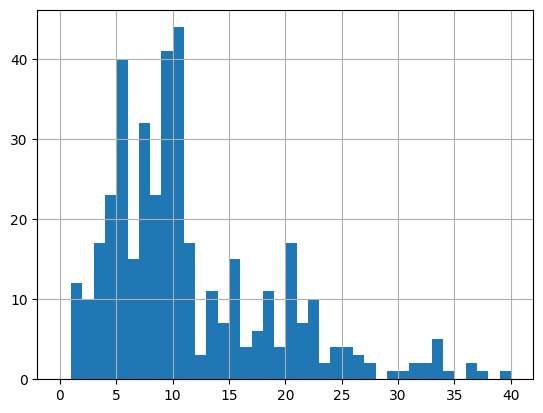

In [18]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(400,weights=attrition_pop['YearsAtCompany'])

# Print the sample
print(attrition_weight)

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

## Cluster sampling
One problem with stratified sampling is that we need to collect data from every subgroup. In cases where collecting data is expensive, for example, when we have to physically travel to a location to collect it, it can make our analysis prohibitively expensive. There's a cheaper alternative called cluster sampling.  

* Use random sampling to pick some subgroups
* Use random sampling on only those subgroups



Explore the JobRole column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

In [19]:
# Create a list of unique JobRole values
import random
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole").sample(10,random_state=2022)


# Print the sample
print(attrition_clust)

      Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
1348   44        1.0  ...                       3                     6
886    41        0.0  ...                       1                     2
983    39        0.0  ...                       3                     6
88     27        1.0  ...                       0                     0
189    34        0.0  ...                       0                     2
160    24        0.0  ...                       2                     1
839    46        0.0  ...                       5                     7
966    30        0.0  ...                       4                     7
162    28        0.0  ...                       2                     2
1231   37        0.0  ...                       4                     7
599    33        0.0  ...                       0                     2
620    40        0.0  ...                       0                     0
853    36        0.0  ...                       1               

## Comparing random samples
* Simple random sampling uses .sample with either n or frac set to determine how many rows to pseudo-randomly choose, given a seed value set with random_state.  
* Stratified sampling groups by subgroups before performing simple random sampling.
* Cluster sampling is designed to give us an answer that's almost as good while using less data. 

3 kinds of sampling

You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

In [20]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25,random_state=2022)

# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction").sample(frac=0.25,random_state=2022)

In [21]:
len(attrition_strat)

368

In [22]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop["RelationshipSatisfaction"].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique,k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop["RelationshipSatisfaction"].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()
attrition_clust=attrition_clust_prep.sample(368,random_state=2022)

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
print(attrition_clust.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 678 to 1364
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       368 non-null    int32   
 1   Attrition                 368 non-null    float64 
 2   BusinessTravel            368 non-null    category
 3   DailyRate                 368 non-null    int32   
 4   Department                368 non-null    category
 5   DistanceFromHome          368 non-null    int32   
 6   Education                 368 non-null    category
 7   EducationField            368 non-null    category
 8   EnvironmentSatisfaction   368 non-null    category
 9   Gender                    368 non-null    category
 10  HourlyRate                368 non-null    int32   
 11  JobInvolvement            368 non-null    category
 12  JobLevel                  368 non-null    int32   
 13  JobRole                   368 non-null    categ

In [23]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction")['Attrition'].mean()
# Print the result
print(mean_attrition_pop)

# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64
RelationshipSatisfaction
Medium    0.133333
High      0.146789
Name: Attrition, dtype: float64


## Relative error of point estimates
In general, larger sample sizes will give us more accurate results.  

The most common metric for assessing the diference between the population and a sample mean is the relative error.  
The relative error is the absolute difference between the two numbers; that is, we ignore any minus signs, divided by the population mean. Here, we also multiply by one hundred to make it a percentage. 

Calculating relative errors

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [24]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100*abs(mean_attrition_pop-mean_attrition_srs50)/(mean_attrition_pop)

# Print rel_error_pct50
print(rel_error_pct50)

RelationshipSatisfaction
Low          70.947368
Medium       59.600000
High         61.211268
Very_High    59.500000
Name: Attrition, dtype: float64


In [25]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100*abs(mean_attrition_pop-mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

RelationshipSatisfaction
Low          27.368421
Medium        1.000000
High          3.028169
Very_High     1.250000
Name: Attrition, dtype: float64


## Creating a sampling distribution
A *sampling distribution* is a distribution of replicates of point estimates.

[0.18333333333333332, 0.08333333333333333, 0.13333333333333333, 0.16666666666666666, 0.23333333333333334]


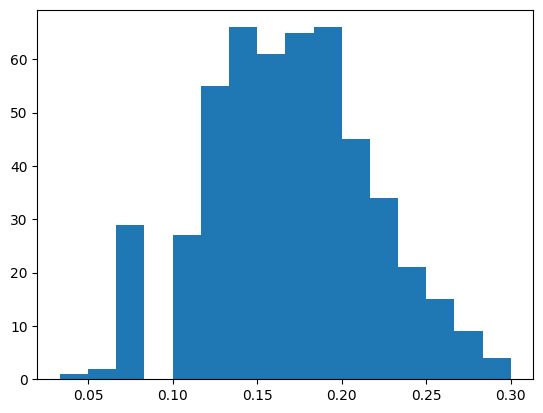

In [26]:
# Create an empty list
mean_attritions=[]
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

# Create a histogram of the 500 sample means
plt.hist(mean_attritions,bins=16)
plt.show()

## Approximate sampling distributions
We saw that while increasing the number of replicates didn't affect the relative error of the sample means; it did result in a more consistent shape to the distribution.  
When it uses the simulated rather than the exact values. It's known as an approximate sampling distribution. Usually, we don't have access to the whole population, so we can't calculate the exact sampling distribution. However, we can feel relatively confident that using an approximation will provide a good guess as to how the sampling distribution will behave. 

### Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. 

In [27]:
# Expand a grid representing 5 8-sided dice
import itertools
def expand_grid(data_dict):
       rows = itertools.product(*data_dict.values())
       return pd.DataFrame.from_records(rows, columns=data_dict.keys())

dice = expand_grid({'die1':[1,2,3,4,5,6,7,8],'die2':[1,2,3,4,5,6,7,8],'die3':[1,2,3,4,5,6,7,8],'die4':[1,2,3,4,5,6,7,8],'die5':[1,2,3,4,5,6,7,8]})

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


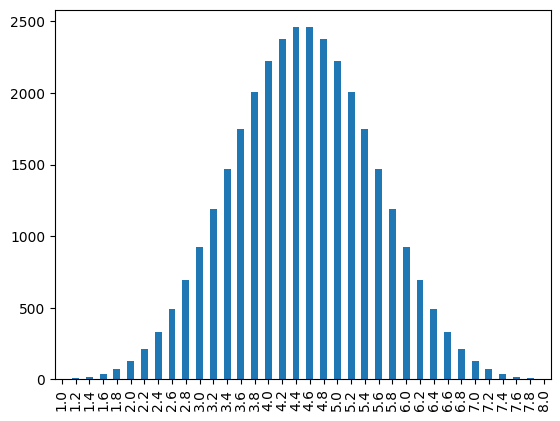

In [28]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [29]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)),size=5,replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

5.2


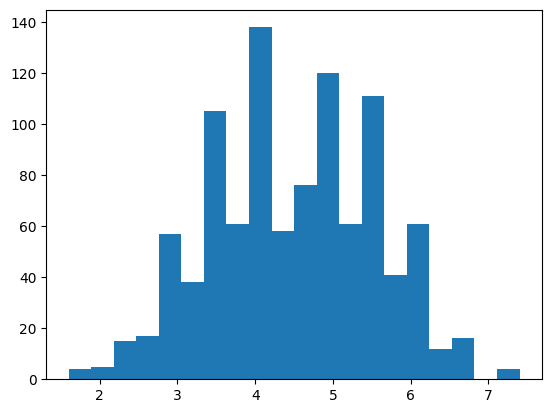

In [30]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=20)
plt.show()

## Standard errors and the Central Limit Theorem  
At the histograms of sampling distributions, as we increase the sample sizes, the width of the distribution shrinks.  
Moreover, the shape curve gets closer to the normal distribution.  
As we saw, the means of independent sample have approximately normal distributions. Then, as we increases the sample sizes:  
* The distribution of the averages gets closer to being normally distributed  
* The width of the sampling distributions gets narrower
* Furthermore, the standard error of the mean also decreases. We must specify the argument ddof=0. It is called standard error. The  standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.  

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

In [31]:
sampling_distribution_5=attrition_pop.sample(n=5,random_state=2022)
sampling_distribution_50=attrition_pop.sample(n=50,random_state=2022)
sampling_distribution_500=attrition_pop.sample(n=500,random_state=2022)

In [32]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

Age                           37.4
Attrition                      0.0
DailyRate                    994.2
DistanceFromHome               7.0
HourlyRate                    61.6
JobLevel                       2.6
MonthlyIncome              10460.8
MonthlyRate                14880.8
NumCompaniesWorked             1.6
PercentSalaryHike             14.6
StockOptionLevel               0.8
TotalWorkingYears             11.2
TrainingTimesLastYear          2.4
YearsAtCompany                 8.8
YearsInCurrentRole             4.6
YearsSinceLastPromotion        3.6
YearsWithCurrManager           5.4
dtype: float64
Age                           37.52
Attrition                      0.06
DailyRate                    835.20
DistanceFromHome               7.08
HourlyRate                    65.80
JobLevel                       2.14
MonthlyIncome               6869.06
MonthlyRate                13849.98
NumCompaniesWorked             2.64
PercentSalaryHike             15.28
StockOptionLevel              

In [33]:
import numpy as np
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5,ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50,ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500,ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

Age                           3.911521
Attrition                     0.000000
DailyRate                   450.583733
DistanceFromHome              7.071068
HourlyRate                   24.885739
JobLevel                      1.516575
MonthlyIncome              5304.118560
MonthlyRate                4610.999100
NumCompaniesWorked            0.894427
PercentSalaryHike             2.509980
StockOptionLevel              1.095445
TotalWorkingYears             8.671793
TrainingTimesLastYear         0.894427
YearsAtCompany                9.731393
YearsInCurrentRole            4.159327
YearsSinceLastPromotion       5.856620
YearsWithCurrManager          5.412947
dtype: float64
Age                           8.832315
Attrition                     0.239898
DailyRate                   402.839817
DistanceFromHome              5.999456
HourlyRate                   20.934300
JobLevel                      1.125040
MonthlyIncome              4662.318068
MonthlyRate                6264.187904
NumCompani

## Introduction to Bootstraping  
 Sampling with replacement is sometimes called resampling.  
 Sampling with replacement is a proxy. 
 
 We're going to use resampling for a technique called bootstrapping. In some sense, bootstrapping is the opposite of sampling from a population. With sampling, we treat the dataset as the population and move to a smaller sample. With bootstrapping, we treat the dataset as a sample and use it to build up a theoretical population. A use case of bootstrapping is to try to understand the variability due to sampling. This is important in cases where we aren't able to sample the population multiple times to create a sampling distribution. 
 
 The bootstrapping process has three steps.  
* First, randomly sample with replacement to get a resample the same size as the original dataset. 
* Then, calculate a statistic, such as a mean of one of the columns. Note that the mean isn't always the choice here and bootstrapping allows for complex statistics to be computed, too.
* Then, replicate this many times to get lots of these bootstrap statistics. 

Generating a bootstrap distribution

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spotify_population = pd.read_feather("datasets/spotify_2000_2020.feather")
spotify_sample=spotify_population[['artists', 'name', 'danceability']]
spotify_sample['index']=spotify_sample.index
print(spotify_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artists       41656 non-null  object 
 1   name          41656 non-null  object 
 2   danceability  41656 non-null  float64
 3   index         41656 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB
None


In [35]:
#Sampling the sample
spotify_sample=spotify_sample.sample(frac=1,random_state=2022)

In [36]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate the mean of danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5915192529287499


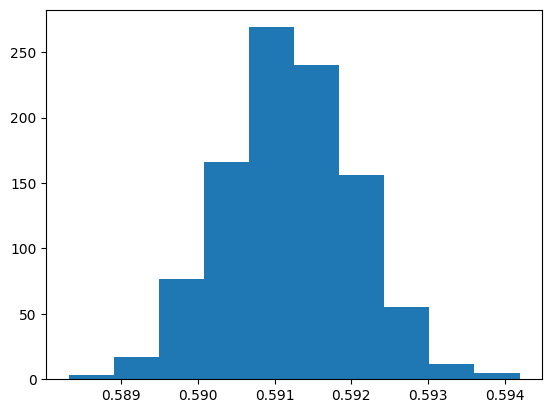

In [37]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

## Comparing sampling and bootstrap distributions
Bootstrap distribution mean:
* Usually close to the sample mean
* If the original sample wasn't closely representative of the population, then the bootstrap distribution mean won't be a good estimate of the population mean.

Bootstraping cannot correct sample bias.  
Remember that one goal of bootstrapping is to quantify what variability we might expect in our sample statistic as we go from one sample to another. This quantity is called standard error. *Standard error multiplied by the square root of a sample size estimates the population standard deviation*

In [38]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population['popularity'].sample(500).mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

spotify_sample=spotify_population.sample(500)

mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000) :
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample['popularity'].sample(500,replace=True).mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[55.392, 55.422, 54.864, 55.054, 55.296, 54.648, 55.368, 54.766, 54.138, 54.688, 55.046, 55.124, 53.924, 55.154, 54.684, 55.09, 55.48, 55.686, 55.548, 54.53, 55.158, 55.296, 54.712, 54.142, 55.146, 54.458, 55.18, 54.966, 53.414, 54.78, 55.296, 54.478, 54.246, 54.526, 54.74, 54.45, 54.162, 54.836, 54.884, 54.222, 54.736, 54.464, 55.4, 54.168, 54.47, 54.546, 54.062, 55.154, 55.442, 53.826, 54.002, 55.204, 54.936, 55.642, 55.476, 54.684, 55.322, 55.002, 55.112, 55.318, 54.132, 54.58, 55.216, 55.258, 54.904, 54.39, 53.406, 54.826, 54.638, 53.906, 54.616, 54.922, 54.292, 54.13, 54.656, 54.396, 54.302, 54.698, 54.288, 54.786, 55.834, 54.896, 54.768, 56.28, 56.13, 55.072, 54.724, 55.602, 55.312, 55.076, 56.384, 53.77, 54.286, 54.772, 54.494, 54.538, 54.572, 55.444, 55.384, 54.914, 54.616, 55.106, 55.366, 55.438, 54.3, 54.48, 53.716, 55.292, 54.538, 55.11, 54.164, 54.814, 55.232, 54.072, 55.562, 54.94, 55.114, 55.192, 55.232, 55.274, 54.618, 55.12, 53.942, 54.844, 55.744, 55.236, 54.874, 54.83

In [39]:
# Calculate the population mean popularity
pop_mean = np.mean(spotify_population['popularity'])

# Calculate the original sample mean popularity
samp_mean = np.mean(spotify_sample['popularity'])

# Calculate the sampling dist'n estimate of mean popularity
sampling_distribution=mean_popularity_2000_samp
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
bootstrap_distribution=mean_popularity_2000_boot
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 53.788, 54.837825, 53.797545]


In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population. 

In [40]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 11.180207963191043, 34.620980965832246, 34.93082358165989]


The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

## Confidence intervals
If we want to include ninety-five percent of the values in the confidence interval, we can use quantiles. Recall that quantiles split distributions into sections containing a particular proportion of the total data. To get the middle ninety-five percent of values, we go from the point 0.025 to 0.977.  
To calculate the lower and upper bounds for this confidence interval, we call quantile from NumPy, passing the distribution values and the quantile values to use.  

There is a second method to calculate confidence intervals. It is called the standard error method.  
First, we calculate the point estimate, which is the mean of the bootstrap distribution, and the standard error, which is estimated by the standard deviation of the bootstrap distribution. Then we call norm.ppf to get the inverse CDF (cumulative distribution function) of the normal distribution with the same mean and standard deviation as the bootstrap distribution.

In [41]:
from scipy.stats import norm
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution,0.025)
upper_quant = np.quantile(bootstrap_distribution,0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(52.817949999999996, 54.748099999999994)


In [42]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution,ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025,loc=point_estimate,scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975,loc=point_estimate,scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(52.82932976020987, 54.765760239790126)


The most important things about this last part are:
* The std of a bootstrap statistic is a good approximation of the standard error
* Can assume bootstrap distributions are normally distributed for confidence intervals